In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import bokeh

In [2]:
%matplotlib inline

In [3]:
python_data = pd.read_csv("cohort_3_python.csv")
python_data.head()

,Name,"Lecture 1, Jan12","Homework 1, Jan13","Lecture 2, Jan 13","Homework 2, Jan14","Lecture 3, Jan 14","Homework 3, Jan15","Lecture 4, Jan 15","Mystery Word, Jan 20","Lecture 5, Jan 20",...,"Blackjack2, Jan26","Lecture 9, Jan26","Random Art, Jan 27","Lecture10, Jan27",Charting,"Lecture11, Jan28",PigSim,"Lecture12, Jan29",Traffic Sim I,"Lecture13,Feb2"
0,P01,3,4.0,3,4,4,5.0,5.0,5,4,...,NaN,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P02,4,3.5,3,5,4,4.5,4.5,5,5,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
2,P03,NaN,5.0,3,4,5,5.0,5.0,5,5,...,6,NaN,NaN,5,5,5,NaN,NaN,NaN,NaN
3,P04,3,3.0,2,3,4,4.0,4.0,4,5,...,NaN,1,3,1,3,5,5,5,5,NaN
4,P05,NaN,3.0,3,3,3,4.0,4.0,4,5,...,4,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
python_data.index = python_data.pop("Name")
python_data.head()

,"Lecture 1, Jan12","Homework 1, Jan13","Lecture 2, Jan 13","Homework 2, Jan14","Lecture 3, Jan 14","Homework 3, Jan15","Lecture 4, Jan 15","Mystery Word, Jan 20","Lecture 5, Jan 20","Currency, Jan 21",...,"Blackjack2, Jan26","Lecture 9, Jan26","Random Art, Jan 27","Lecture10, Jan27",Charting,"Lecture11, Jan28",PigSim,"Lecture12, Jan29",Traffic Sim I,"Lecture13,Feb2"
Name,,,,,,,,,,,,,,,,,,,,,
P01,3,4.0,3,4,4,5.0,5.0,5,4,4,...,NaN,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P02,4,3.5,3,5,4,4.5,4.5,5,5,5,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
P03,NaN,5.0,3,4,5,5.0,5.0,5,5,5,...,6,NaN,NaN,5,5,5,NaN,NaN,NaN,NaN
P04,3,3.0,2,3,4,4.0,4.0,4,5,NaN,...,NaN,1,3,1,3,5,5,5,5,NaN
P05,NaN,3.0,3,3,3,4.0,4.0,4,5,4,...,4,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
python_data.tail()

,"Lecture 1, Jan12","Homework 1, Jan13","Lecture 2, Jan 13","Homework 2, Jan14","Lecture 3, Jan 14","Homework 3, Jan15","Lecture 4, Jan 15","Mystery Word, Jan 20","Lecture 5, Jan 20","Currency, Jan 21",...,"Blackjack2, Jan26","Lecture 9, Jan26","Random Art, Jan 27","Lecture10, Jan27",Charting,"Lecture11, Jan28",PigSim,"Lecture12, Jan29",Traffic Sim I,"Lecture13,Feb2"
Name,,,,,,,,,,,,,,,,,,,,,
P15,2.000000,2.000000,2.000000,2.0,3.000000,3.000000,3.000000,3.000000,3,3.000000,...,3.000000,3.000000,4.000000,3.00,3.000000,3.0,3.000000,3.0000,5,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average,2.791667,3.266667,2.733333,3.2,3.821429,3.766667,3.933333,4.071429,4,3.769231,...,4.416667,3.769231,4.285714,3.69,4.555556,4.4,4.333333,4.6125,NaN,NaN
Min,2.000000,1.000000,1.000000,1.0,2.000000,2.000000,2.000000,3.000000,3,2.000000,...,3.000000,1.000000,2.000000,1.00,3.000000,3.0,3.000000,3.0000,NaN,NaN
Max,4.000000,5.000000,4.000000,5.0,5.000000,5.000000,5.000000,5.000000,5,5.000000,...,6.000000,5.000000,6.000000,5.00,6.000000,5.0,5.000000,6.0000,NaN,NaN


In [6]:
python_data = python_data.dropna(how="all")

pydata = python_data

In [7]:
pydata = pydata.rename(columns=lambda x: x.replace('Jan', ''))
pydata = pydata.rename(columns=lambda x: x.replace('Lecture', 'L'))
pydata = pydata.rename(columns=lambda x: x.replace('Homework', 'H'))
pydata = pydata.rename(columns=lambda x: x.replace((r"[0-9]"), " " ))
pydata


,"L 1, 12","H 1, 13","L 2, 13","H 2, 14","L 3, 14","H 3, 15","L 4, 15","Mystery Word, 20","L 5, 20","Currency, 21",...,"Blackjack2, 26","L 9, 26","Random Art, 27","L10, 27",Charting,"L11, 28",PigSim,"L12, 29",Traffic Sim I,"L13,Feb2"
Name,,,,,,,,,,,,,,,,,,,,,
P01,3.000000,4.000000,3.000000,4.0,4.000000,5.000000,5.000000,5.000000,4,4.000000,...,NaN,4.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P02,4.000000,3.500000,3.000000,5.0,4.000000,4.500000,4.500000,5.000000,5,5.000000,...,5.000000,5.000000,5.000000,NaN,NaN,5.0,5.000000,5.0000,NaN,NaN
P03,NaN,5.000000,3.000000,4.0,5.000000,5.000000,5.000000,5.000000,5,5.000000,...,6.000000,NaN,NaN,5.00,5.000000,5.0,NaN,NaN,NaN,NaN
P04,3.000000,3.000000,2.000000,3.0,4.000000,4.000000,4.000000,4.000000,5,NaN,...,NaN,1.000000,3.000000,1.00,3.000000,5.0,5.000000,5.0000,5.0,NaN
P05,NaN,3.000000,3.000000,3.0,3.000000,4.000000,4.000000,4.000000,5,4.000000,...,4.000000,3.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P06,3.000000,3.500000,3.000000,3.0,3.000000,3.000000,4.000000,4.000000,3,3.000000,...,5.000000,4.000000,5.000000,3.00,4.000000,4.0,4.000000,NaN,NaN,NaN
P07,3.500000,4.000000,3.000000,4.0,5.000000,4.000000,4.500000,4.000000,5,5.000000,...,NaN,5.000000,4.000000,4.90,5.000000,4.0,4.000000,4.9000,4.9,NaN
P08,2.000000,3.000000,2.000000,3.0,4.000000,4.000000,3.000000,4.000000,3,3.000000,...,5.000000,5.000000,5.000000,5.00,5.000000,4.0,4.000000,4.0000,5.0,5
P09,NaN,1.000000,1.000000,1.0,2.000000,2.000000,2.000000,3.000000,3,2.000000,...,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pieces = {'Jan 12': pydata.ix[:, [0]], 'Jan 13': pydata.ix[:, [1, 2]], 'Jan 14': pydata.ix[:, [3, 4]],
          'Jan 15': pydata.ix[:, [5, 6]], 'Jan 16': pydata.ix[:, [7, 8]], 'Jan 17': pydata.ix[:, [9, 10]],
          'Jan 18': pydata.ix[:, [11, 12]], 'Jan 19': pydata.ix[:, [13, 14]], 'Jan 20': pydata.ix[:, [15, 16]],
          'Jan 21': pydata.ix[:, [17, 18]], 'Jan 22': pydata.ix[:, [19, 20]], 'Jan 23': pydata.ix[:, [21, 22]],
          'Jan 24': pydata.ix[:, [23]]}
                                                              
pydata = pd.concat(pieces, axis=1)
pydata

Jan 12    Jan 13            Jan 14              Jan 15            \
          L 1, 12   H 1, 13  L 2,  13 H 2, 14  L 3,  14   H 3, 15  L 4,  15   
Name                                                                          
P01      3.000000  4.000000  3.000000     4.0  4.000000  5.000000  5.000000   
P02      4.000000  3.500000  3.000000     5.0  4.000000  4.500000  4.500000   
P03           NaN  5.000000  3.000000     4.0  5.000000  5.000000  5.000000   
P04      3.000000  3.000000  2.000000     3.0  4.000000  4.000000  4.000000   
P05           NaN  3.000000  3.000000     3.0  3.000000  4.000000  4.000000   
P06      3.000000  3.500000  3.000000     3.0  3.000000  3.000000  4.000000   
P07      3.500000  4.000000  3.000000     4.0  5.000000  4.000000  4.500000   
P08      2.000000  3.000000  2.000000     3.0  4.000000  4.000000  3.000000   
P09           NaN  1.000000  1.000000     1.0  2.000000  2.000000  2.000000   
P10      2.000000  2.000000  2.000000     3.0       NaN  3.000000  3.000000   
P11      2.000000  5.000000  4.000000     3.0  5.000000  4.000000  4.000000   
P12      3.500000  4.000000  4.000000     4.0  4.500000  5.000000  5.000000   
P13      2.500000  3.000000  3.000000     3.0  3.000000  3.000000  4.000000   
P14      3.000000  3.000000  3.000000     3.0  4.000000  3.000000  4.000000   
P15      2.000000  2.000000  2.000000     2.0  3.000000  3.000000  3.000000   
Average  2.791667  3.266667  2.733333     3.2  3.821429  3.766667  3.933333   
Min      2.000000  1.000000  1.000000     1.0  2.000000  2.000000  2.000000   
Max      4.000000  5.000000  4.000000     5.0  5.000000  5.000000  5.000000   

                   Jan 16                 Jan 17   ...            Jan 19  \
        Mystery Word,  20 L 5,  20 Currency,  21   ...    Blackjack2, 26   
Name                                               ...                     
P01              5.000000        4      4.000000   ...               NaN   
P02              5.000000        5      5.000000   ...          5.000000   
P03              5.000000        5      5.000000   ...          6.000000   
P04              4.000000        5           NaN   ...               NaN   
P05              4.000000        5      4.000000   ...          4.000000   
P06              4.000000        3      3.000000   ...          5.000000   
P07              4.000000        5      5.000000   ...               NaN   
P08              4.000000        3      3.000000   ...          5.000000   
P09              3.000000        3      2.000000   ...          3.000000   
P10              3.000000        3      4.000000   ...          5.000000   
P11              4.000000        4           NaN   ...          4.000000   
P12              5.000000        5      4.000000   ...          5.000000   
P13                   NaN        3      3.000000   ...          4.000000   
P14              4.000000        4      4.000000   ...          4.000000   
P15              3.000000        3      3.000000   ...          3.000000   
Average          4.071429        4      3.769231   ...          4.416667   
Min              3.000000        3      2.000000   ...          3.000000   
Max              5.000000        5      5.000000   ...          6.000000   

           Jan 20                  Jan 21            Jan 22            Jan 23  \
          L 9, 26 Random Art,  27 L10, 27  Charting L11, 28    PigSim L12, 29   
Name                                                                            
P01      4.000000        5.000000     NaN       NaN     NaN       NaN     NaN   
P02      5.000000        5.000000     NaN       NaN     5.0  5.000000  5.0000   
P03           NaN             NaN    5.00  5.000000     5.0       NaN     NaN   
P04      1.000000        3.000000    1.00  3.000000     5.0  5.000000  5.0000   
P05      3.000000        6.000000     NaN       NaN     NaN       NaN     NaN   
P06      4.000000        5.000000    3.00  4.000000     4.0  4.000000     NaN   
P07      5.000000        

In [9]:
flipped = pydata.transpose()
flipped

Name                      P01  P02  P03  P04  P05  P06  P07  P08  P09  P10  \
Jan 12 L 1, 12            3.0  4.0  NaN    3  NaN  3.0  3.5  2.0  NaN    2   
Jan 13 H 1, 13            4.0  3.5    5    3    3  3.5  4.0  3.0    1    2   
       L 2,  13           3.0  3.0    3    2    3  3.0  3.0  2.0    1    2   
Jan 14 H 2, 14            4.0  5.0    4    3    3  3.0  4.0  3.0    1    3   
       L 3,  14           4.0  4.0    5    4    3  3.0  5.0  4.0    2  NaN   
Jan 15 H 3, 15            5.0  4.5    5    4    4  3.0  4.0  4.0    2    3   
       L 4,  15           5.0  4.5    5    4    4  4.0  4.5  3.0    2    3   
Jan 16 Mystery Word,  20  5.0  5.0    5    4    4  4.0  4.0  4.0    3    3   
       L 5,  20           4.0  5.0    5    5    5  3.0  5.0  3.0    3    3   
Jan 17 Currency,  21      4.0  5.0    5  NaN    4  3.0  5.0  3.0    2    4   
       L 6, 21            4.0  5.0    5    4    4  5.0  5.0  5.0    3    4   
Jan 18 Blackjack1,  22    5.5  5.0    5  NaN    5  NaN  5.0  5.5    2    4   
       L 7,  22           4.0  NaN  NaN    4    4  5.0  4.0  4.0    3    4   
Jan 19 L 8,  23           5.5  NaN    5    4    4  5.0  5.0  5.0    3    5   
       Blackjack2, 26     NaN  5.0    6  NaN    4  5.0  NaN  5.0    3    5   
Jan 20 L 9, 26            4.0  5.0  NaN    1    3  4.0  5.0  5.0    3    4   
       Random Art,  27    5.0  5.0  NaN    3    6  5.0  4.0  5.0    2    5   
Jan 21 L10, 27            NaN  NaN    5    1  NaN  3.0  4.9  5.0  NaN    4   
       Charting           NaN  NaN    5    3  NaN  4.0  5.0  5.0  NaN    5   
Jan 22 L11, 28            NaN  5.0    5    5  NaN  4.0  4.0  4.0  NaN    4   
       PigSim             NaN  5.0  NaN    5  NaN  4.0  4.0  4.0  NaN    5   
Jan 23 L12, 29            NaN  5.0  NaN    5  NaN  NaN  4.9  4.0  NaN    4   
       Traffic Sim I      NaN  NaN  NaN    5  NaN  NaN  4.9  5.0  NaN  NaN   
Jan 24 L13,Feb2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN   

Name                      P11  P12  P13  P14  P15   Average  Min  Max  
Jan 12 L 1, 12              2  3.5  2.5    3    2  2.791667    2  4.0  
Jan 13 H 1, 13              5  4.0  3.0    3    2  3.266667    1  5.0  
       L 2,  13             4  4.0  3.0    3    2  2.733333    1  4.0  
Jan 14 H 2, 14              3  4.0  3.0    3    2  3.200000    1  5.0  
       L 3,  14             5  4.5  3.0    4    3  3.821429    2  5.0  
Jan 15 H 3, 15              4  5.0  3.0    3    3  3.766667    2  5.0  
       L 4,  15             4  5.0  4.0    4    3  3.933333    2  5.0  
Jan 16 Mystery Word,  20    4  5.0  NaN    4    3  4.071429    3  5.0  
       L 5,  20             4  5.0  3.0    4    3  4.000000    3  5.0  
Jan 17 Currency,  21      NaN  4.0  3.0    4    3  3.769231    2  5.0  
       L 6, 21            NaN  4.0  3.0    4    3  4.142857    3  5.0  
Jan 18 Blackjack1,  22      4  4.0  4.0    4    3  4.307692    2  5.5  
       L 7,  22             4  NaN  4.0  NaN    3  3.909091    3  5.0  
Jan 19 L 8,  23             4  5.5  4.0  NaN    3  4.461538    3  5.5  
       Blackjack2, 26       4  5.0  4.0    4    3  4.416667    3  6.0  
Jan 20 L 9, 26              4  4.0  NaN    4    3  3.769231    1  5.0  
       Random Art,  27      4  4.0  5.0    3    4  4.285714    2  6.0  
Jan 21 L10, 27              4  4.0  3.0  NaN    3  3.690000    1  5.0  
       Charting             5  6.0  NaN  NaN    3  4.555556    3  6.0  
Jan 22 L11, 28              5  5.0  NaN  NaN    3  4.400000    3  5.0  
       PigSim               4  5.0  NaN  NaN    3  4.333333    3  5.0  
Jan 23 L12, 29              5  6.0  NaN  NaN    3  4.612500    3  6.0  
       Traffic Sim I        5  NaN  NaN  NaN    5       NaN  NaN  NaN  
Jan 24 L13,Feb2           NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN

In [14]:
# del flipped["Max"]
# Deleted column 'Max' in place. Will get error if re-run.
flipped.head()



Name             P01  P02  P03  P04  P05  P06  P07  P08  P09  P10  P11  P12  \
Jan 12 L 1, 12     3  4.0  NaN    3  NaN  3.0  3.5    2  NaN    2    2  3.5   
Jan 13 H 1, 13     4  3.5    5    3    3  3.5  4.0    3    1    2    5  4.0   
       L 2,  13    3  3.0    3    2    3  3.0  3.0    2    1    2    4  4.0   
Jan 14 H 2, 14     4  5.0    4    3    3  3.0  4.0    3    1    3    3  4.0   
       L 3,  14    4  4.0    5    4    3  3.0  5.0    4    2  NaN    5  4.5   

Name             P13  P14  P15   Average  Min  
Jan 12 L 1, 12   2.5    3    2  2.791667    2  
Jan 13 H 1, 13   3.0    3    2  3.266667    1  
       L 2,  13  3.0    3    2  2.733333    1  
Jan 14 H 2, 14   3.0    3    2  3.200000    1  
       L 3,  14  3.0    4    3  3.821429    2

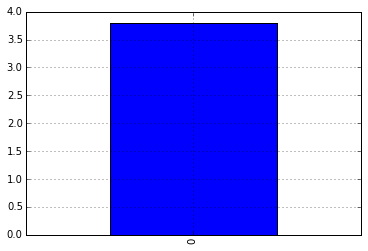

In [15]:
Jan_12 = flipped.ix["Jan 12"]
Jan_13 = flipped.ix["Jan 13"]
# Jan_12.plot(kind="bar")
mean = (flipped.mean()).mean()
pd.Series(mean).plot(kind="bar")

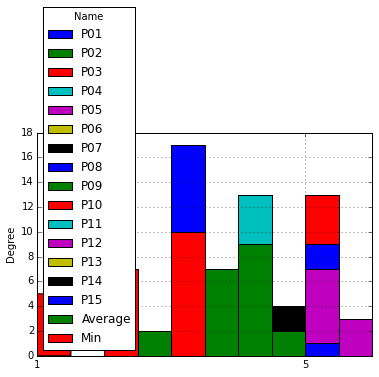

In [16]:
flipped.plot(kind="hist", xticks=[1,5])

4.0625

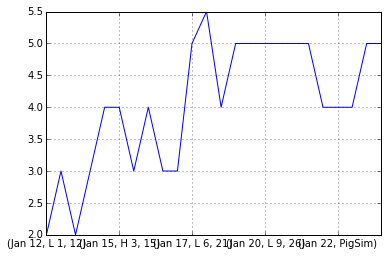

In [17]:
#Python Student P08 difficulty over time.

pydata.ix["P08"].plot()
pydata.ix["P08"].mean()


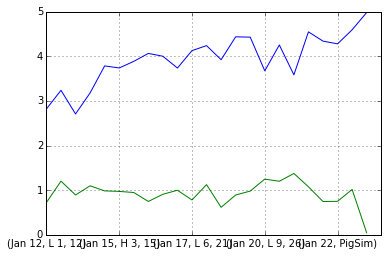

In [18]:
#Python Class student mean - Blue
#Python Class stdev - Green

pydata.mean().plot()
pydata.std().plot()